In [211]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [212]:
data = pd.read_csv('d:/data/new_data/Dataset/Dataset/data3/google_cleaned.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [213]:
data.duplicated().sum()
data.drop_duplicates(subset='App',keep='first',inplace=True)

In [215]:
data['App'] = data.App.apply(lambda x:str(x).split('-')[0])
smb = data.App[2].split(' ')[3]
data['App'] = data.App.apply(lambda x:str(x).split(smb)[0])
data['App'] = data.App.apply(lambda x:str(x).split(':')[0])
data['App'] = data.App.apply(lambda x:x.strip())

In [216]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,U Launcher Lite,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015


#### Separate lists of numeric and categorical columns

In [217]:
num_features = [cols for cols in data.columns if data[cols].dtype != 'O']
cat_features = [cols for cols in data.columns if data[cols].dtype == 'O']

print('Data has {} numerical columns: {}'.format(len(num_features),num_features))
print('Data has {} catagorical columns: {}'.format(len(cat_features),cat_features))

Data has 8 numerical columns: ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']
Data has 8 catagorical columns: ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


#### Univariate Analysis:
- This analysis is done for considering single variable and is the simplest form of analysis. 



##### Numarical Variable:

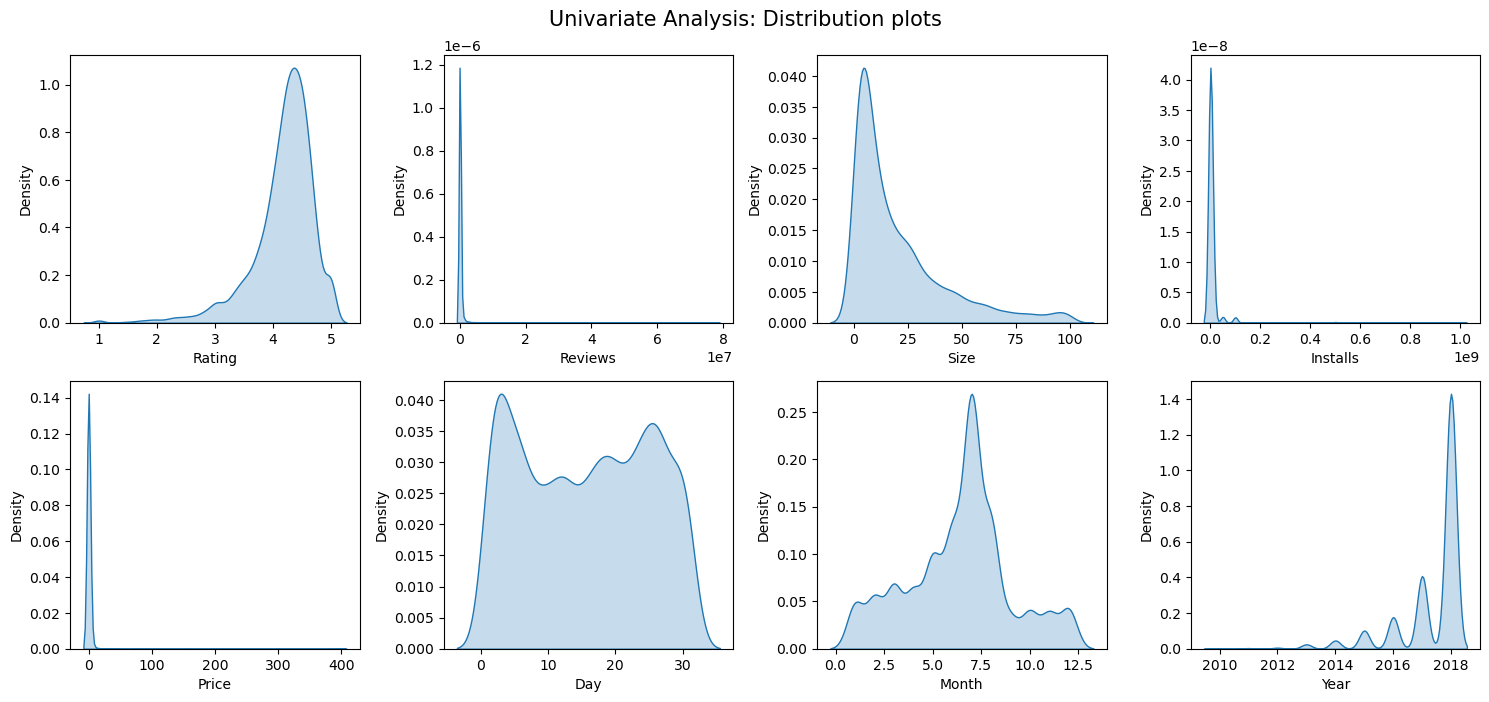

In [218]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis: Distribution plots',fontsize=15)
for i in range(0,len(num_features)):
    plt.subplot(3,4,i+1)
    sns.kdeplot(x = data[num_features[i]],fill=True)
    plt.xlabel(num_features[i])
    plt.tight_layout()

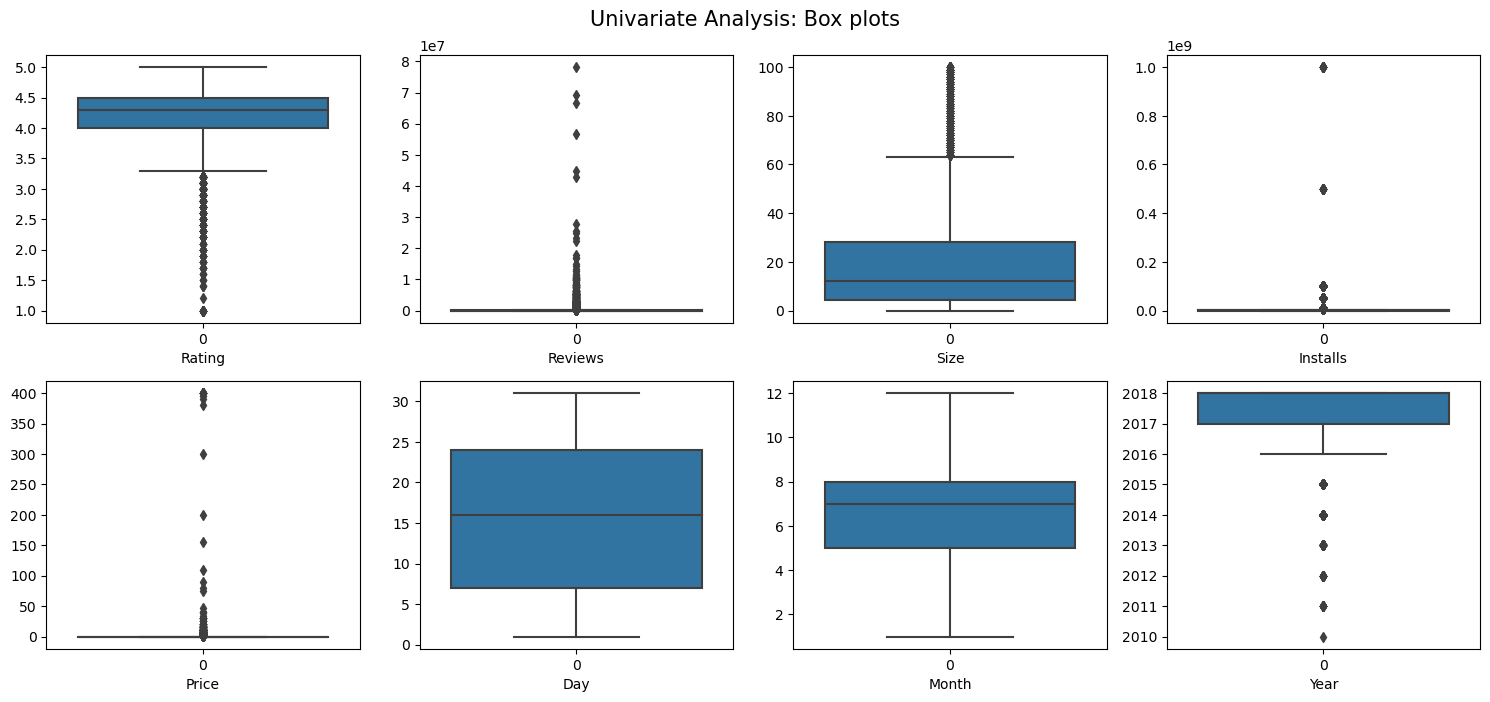

In [219]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis: Box plots',fontsize=15)
for i in range(0,len(num_features)):
    plt.subplot(3,4,i+1)
    sns.boxplot(data[num_features[i]])
    plt.xlabel(num_features[i])
    plt.tight_layout()

##### Conclusions from charts above:


- Ratings and Year of updates are left skewed. While, Reviews, Size, Installs, Price are right skewed(log normal distribution)
- Rating, Reviews, Size, Installs, Price are the columns with outliers.
- Most of the applications are updated between June to August months.
- Number of applications updated per year increases with time and in the year 2018, highest number of applications are updated.
- Majority of the applications are either free or cost very less.

##### Categorical Variable:

In [220]:
cat_features = [ele for ele in cat_features if ele not in ['App','Last Updated','Current Ver']]

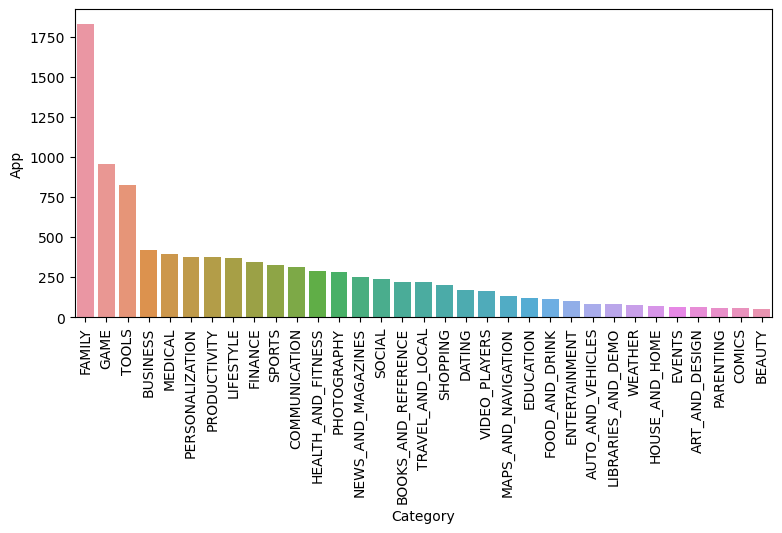

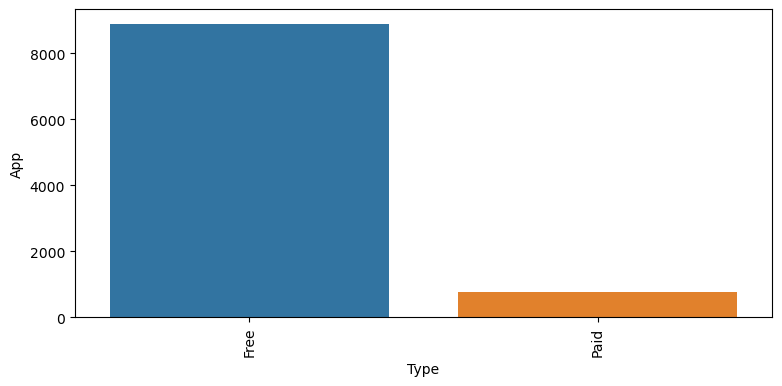

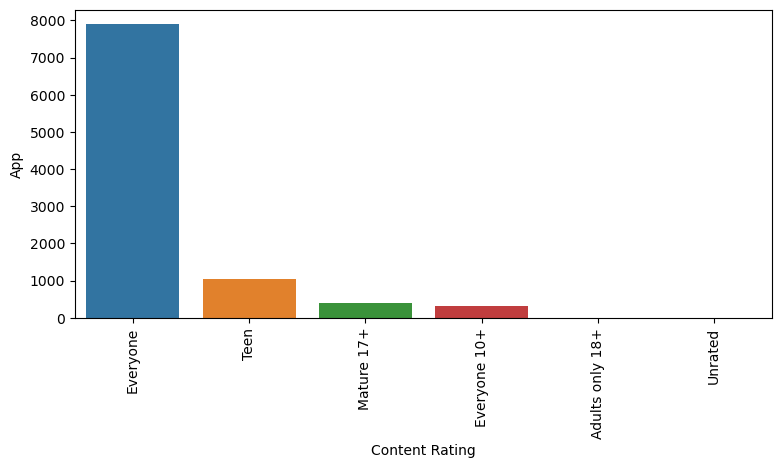

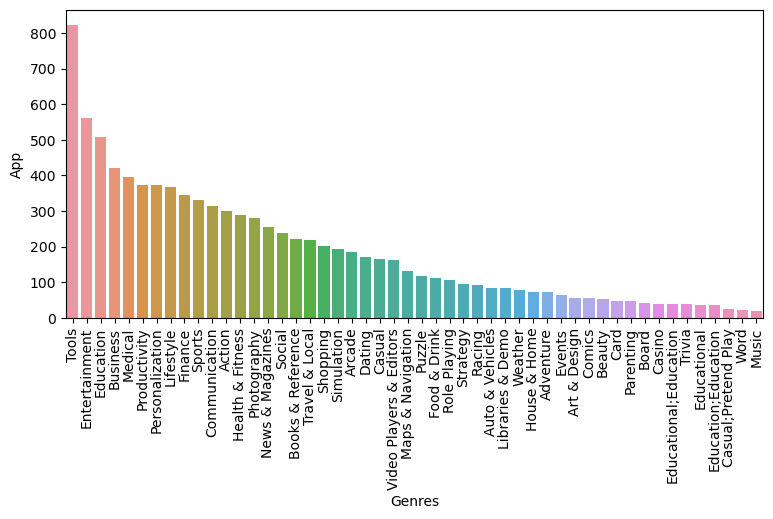

In [258]:
# plt.suptitle('Univariate Analysis:Count plot',fontsize=15)
for i in range(0,len(cat_features)-1):
    data_cat = data.groupby(cat_features[i]).App.count().reset_index().sort_values(by='App',ascending=False)
    # data_cat.head(50).plot.bar(color = 'teal',x=cat_features[i])
    plt.figure(figsize=(9,4))
    sns.barplot(data_cat.head(50),x=cat_features[i],y='App')
    plt.xlabel(cat_features[i])
    plt.xticks(rotation=90)
    plt.show()


- Here, I have just considered top 50 Genres in the plot. All the graph shows number of applications per each categorical feature.
- Family and Games are among the top categories of applications.
- Compared to paid, number of free applications are very high.
- Tools, Entertainment and Education are among the top genres.

#### Multivariant Analysis:

In [222]:
data[(list(data.columns)[1:])].corr()

,Rating,Reviews,Size,Installs,Price,Day,Month,Year
Rating,1.000000,0.055081,0.063303,0.040143,-0.021199,-0.010430,0.011523,0.125843
Reviews,0.055081,1.000000,0.179320,0.625165,-0.007598,-0.033099,0.036541,0.058073
Size,0.063303,0.179320,1.000000,0.134310,-0.022397,-0.013338,0.033442,0.208094
Installs,0.040143,0.625165,0.134310,1.000000,-0.009405,-0.042036,0.043178,0.068839
Price,-0.021199,-0.007598,-0.022397,-0.009405,1.000000,-0.009106,0.007348,-0.003608
Day,-0.010430,-0.033099,-0.013338,-0.042036,-0.009106,1.000000,-0.066566,-0.015070
Month,0.011523,0.036541,0.033442,0.043178,0.007348,-0.066566,1.000000,-0.199906
Year,0.125843,0.058073,0.208094,0.068839,-0.003608,-0.015070,-0.199906,1.000000


<AxesSubplot:>

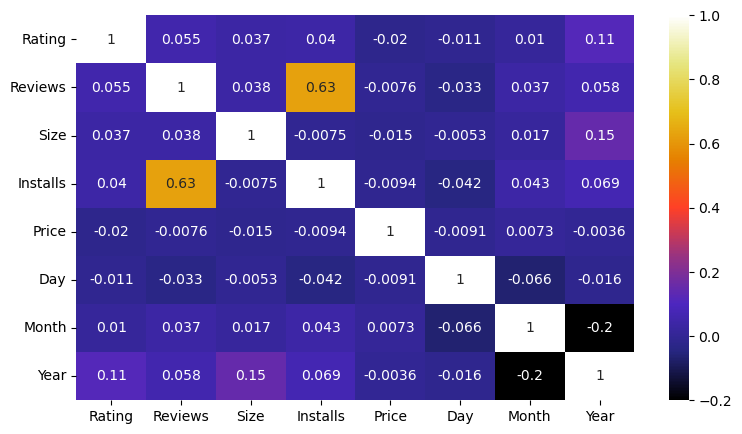

In [260]:
plt.figure(figsize=(9,5))
sns.heatmap(data.corr(), cmap="CMRmap", annot=True)

- It is clearly visible here that number of installs and number of reviews are highly correlated.

#### Remove null values in Rating and Size column:

- To remove null values form Rating column, I have defined a new dataframe containing mean rating value for each available category of App. Using this dataframe, null values will be replaced according to the category of respective App. This can be call replacing null values conditionally. 
- As all the Application with size mentioned has size > 0, we can easily differentiate Apps with size 0 are the Apps for which sizes are not defined.

In [224]:
data.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Day                  0
Month                0
Year                 0
dtype: int64

In [225]:
rating_df = data.groupby('Category').Rating.mean().reset_index()
rating_df.head()

,Category,Rating
0,ART_AND_DESIGN,4.357377
1,AUTO_AND_VEHICLES,4.190411
2,BEAUTY,4.278571
3,BOOKS_AND_REFERENCE,4.344970
4,BUSINESS,4.098479


In [226]:
data = pd.merge(data,rating_df,on='Category',how='left')

In [227]:
data.Rating_x.fillna(data.Rating_y,inplace=True)
data.rename(columns={'Rating_x':'Rating'},inplace=True)
data.drop(columns='Rating_y',inplace=True)
data.Size.fillna(0,inplace=True)
data.dropna(inplace=True)

In [228]:
data.isna().sum().sum()

0

#### General Analysis:
##### Top 10 Genres by application

Text(0.5, 1.0, 'Top 10 Genres by application')

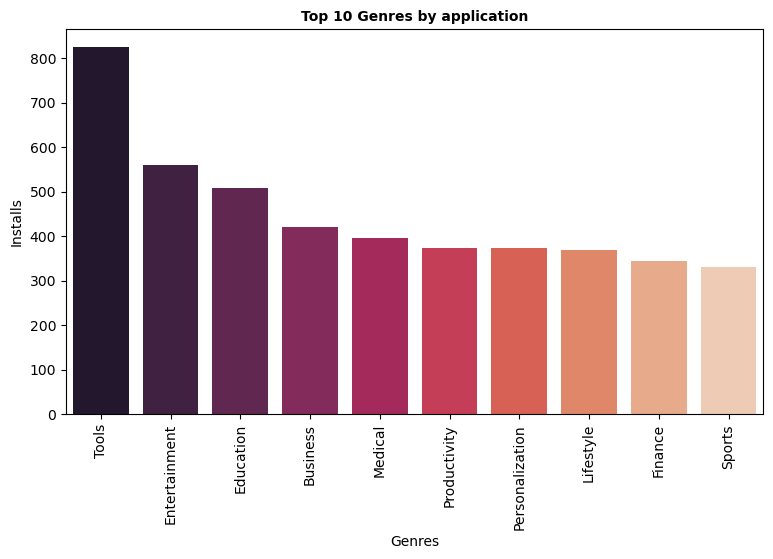

In [261]:
data_genres = data.groupby('Genres').Installs.count().reset_index().sort_values(by='Installs',ascending=False)
plt.figure(figsize=(9,5))
sns.barplot(data_genres.head(10),x='Genres',y='Installs',palette = "rocket")
plt.xticks(rotation = 90)
plt.title('Top 10 Genres by application',fontsize=10,fontweight='bold')

##### Top 10 Applications by Reviews

Text(0.5, 1.0, 'Top 10 application by Reviews')

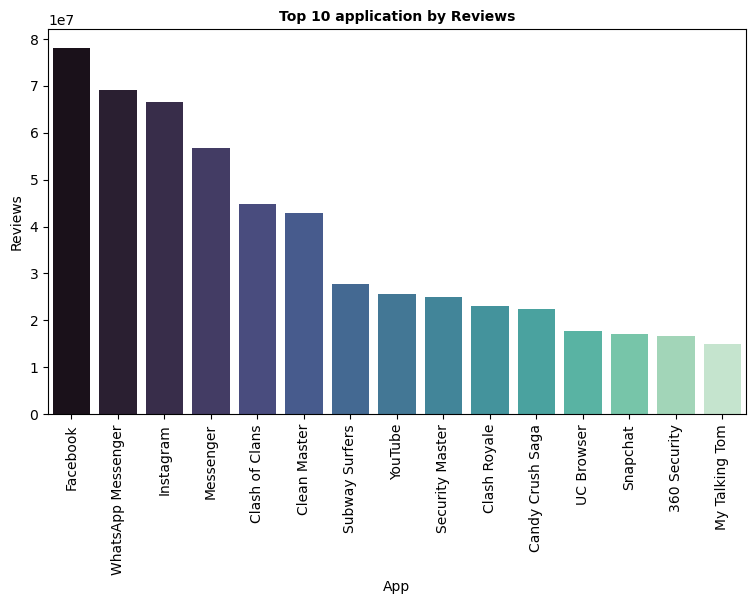

In [262]:
plt.figure(figsize=(9,5))
sns.barplot(data.sort_values(by='Reviews',ascending=False).head(15),x='App',y='Reviews',palette='mako')
plt.xticks(rotation = 90)
plt.title('Top 10 application by Reviews',fontsize=10,fontweight='bold')

##### Application updates by month

Text(0.5, 1.0, 'Top 10 largest application')

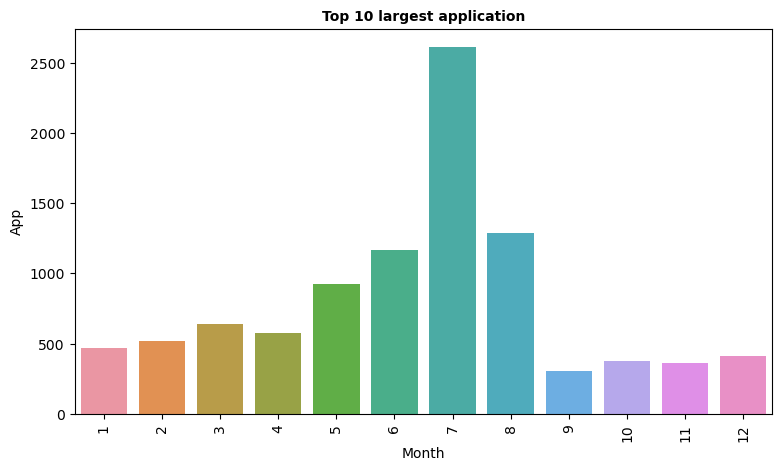

In [263]:
month_df = data.groupby('Month').App.count().reset_index().sort_values(by='Month')
plt.figure(figsize=(9,5))
sns.barplot(month_df,x='Month',y='App')
plt.xticks(rotation = 90)
plt.title('Top 10 largest application',fontsize=10,fontweight='bold')